In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('2_class_data.csv')

In [3]:
df.head()

,x1,x2,y
0,0.24539,0.81725,0
1,0.21774,0.76462,0
2,0.20161,0.69737,0
3,0.20161,0.58041,0
4,0.24770,0.49561,0


In [4]:
import numpy as np
X=np.array(df[['x1',"x2"]])
Y=np.array(df['y'])

In [5]:
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC

In [6]:
# lr=LinearRegression()
tree=DecisionTreeClassifier()
# svc=SVC(C=1, kernel='poly')
from sklearn.metrics import accuracy_score

In [8]:
# lr.fit(X,Y)
tree.fit(X,Y)
# svc.fit(X,Y)

DecisionTreeClassifier()

In [9]:
y_pred=tree.predict(X)

In [11]:
accuracy_score(Y, y_pred)

1.0

In [8]:
import matplotlib.pyplot as plt
X.shape,Y.shape


((100, 2), (100,))

In [9]:
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, Y)

In [10]:
y2

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [11]:
def draw_learning_curves(X, y, estimator, num_trainings,cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

In [12]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [13]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

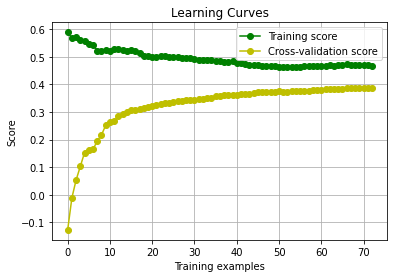

In [14]:
import warnings
warnings.filterwarnings("ignore")
draw_learning_curves(X,Y,lr,100,cv)

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 10]}

In [17]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
scorer = make_scorer(f1_score)

In [18]:
# Create the object.
grid_obj = GridSearchCV(svc, parameters, scoring=scorer)
# Fit the data
grid_fit = grid_obj.fit(X, Y)

In [19]:
best_clf = grid_fit.best_estimator_

In [20]:
best_clf

SVC(C=1, kernel='poly')

In [1]:
import pandas as pd

# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_table('smsspamcollection/SMSSpamCollection', header=None, names=['label', 'sms_message'])
#df.columns = ['label', 'sms_message']

# Output printing out first 5 columns
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
verify={
    'ham':0,
    'spam':1
}
df['label']=df.label.map(verify)

In [3]:
df.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [7]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [10]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [11]:
predictions = naive_bayes.predict(testing_data)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9885139985642498
Precision score:  0.9720670391061452
Recall score:  0.9405405405405406
F1 score:  0.9560439560439562
